**Example to illustrate the functioning of the logistic regression unit in a simple classification problem using the CIRCLE dataset of Tinker**
Consider two inputs x1 and x2 connected to 1 hidden layer unit which is then connected to the output unit. What is the transformation performed by the hidden layer unit? What then does the output unit do to transform it further?  Try to run the Tinker case and see if you can explain fully the outputs of the hidden and output neurons....using the math involved. Only then run this notebook to maximize your understanding.


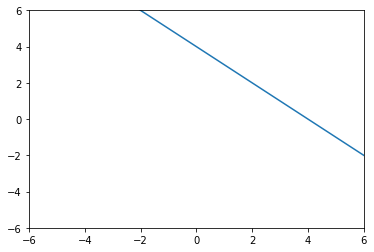

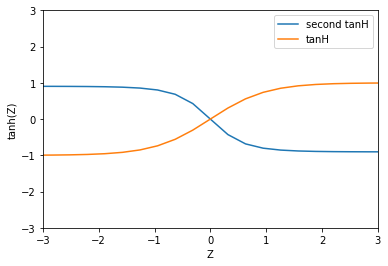

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-6, 6, num=100)
x2 = np.linspace(-6, 6, num=100)

Z1 = []
tanhZ = []

#first neuron
for i in range(x1.shape[0]):
    z = -1.3*x1[i] -1.3*x2[i] + 5.2
    tanhz = np.tanh(z)
    Z1.append(z)
    tanhZ.append(tanhz)
    

plt.plot(x1,(-x1+5.2/1.3))
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()

# second neuron
second_tanH = []

for i in range(len(tanhZ)):
    z2 = np.tanh(-1.5*tanhZ[i])
    second_tanH.append(z2)
    
plt.plot(Z1,second_tanH,label='second tanH')
plt.plot(Z1,tanhZ, label='tanH')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.ylabel("tanh(Z)")
plt.xlabel("Z")
plt.legend()
plt.show()


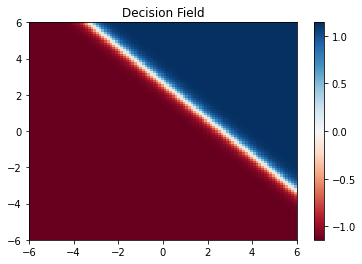

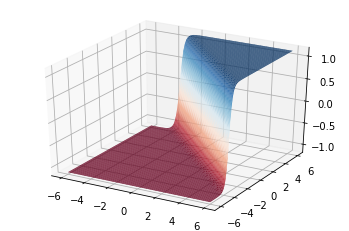

In [4]:
x1_weight = -2 #@param {type: 'number'}
x2_weight = -2 #@param {type: 'number'}
bias = 5.2 #@param {type: 'number'}

def Z(x1, x2):
    return -1.5 *  np.tanh(np.tanh((x1_weight * x1) + (x2_weight * x2) + bias))

z = np.array([[Z(i,j) for i in x1] for j in x2])

z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

#heatmap visualization
fig, ax = plt.subplots()

c = ax.pcolormesh(x1, x2, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('Decision Field')
# set the limits of the plot to the limits of the data
fig.colorbar(c, ax=ax)
plt.show()

#3d visualization
fig = plt.figure()
ax = plt.axes(projection='3d')

X1_plot, X2_plot = np.meshgrid(x1, x2)
Z_plot = Z(X1_plot, X2_plot)

ax.plot_surface(X1_plot, X2_plot, Z_plot, rstride=1, cstride=1, cmap='RdBu')